To create a program that dewarps a curled page from a book, you can use a combination of image processing techniques and machine learning. Here's a step-by-step plan:

1. **Set Up Environment**: Ensure you have the necessary libraries installed.
2. **Image Preprocessing**: Load and preprocess the image.
3. **Edge Detection**: Detect edges to identify the curled page boundaries.
4. **Contour Detection**: Find contours to understand the shape of the page.
5. **Perspective Transformation**: Apply a perspective transformation to dewarp the page.
6. **Text and Image Handling**: Use OCR for text and image processing techniques for photobook pages.

Here's a basic implementation using OpenCV and Tesseract OCR:

### Step 1: Set Up Environment

Ensure you have the following libraries installed:



In [34]:
# pip install opencv-python-headless numpy pytesseract



### Step 2: Implement the Dewarping Program

Create a Python script, e.g., `dewarp_page.py`:



In [35]:
import cv2
import numpy as np
import pytesseract
import os
from PIL import Image
import matplotlib.pyplot as plt

In [36]:
def resize_image(input_image_path, desired_height, output_image_path=None):
    original_image = Image.open(input_image_path)
    # rotate image if it is not in portrait mode
    width, height = original_image.size
    print(width, height)
    # scale image to desired height
    if height > width:
        width = int(width * desired_height / height)
        height = desired_height
        print(width, height)
        resized_image = original_image.resize((width, height))
        # resized_image.save(output_image_path)
    else:
        height = int(height * desired_height / width)
        width = desired_height
        print(width, height)
        resized_image = original_image.resize((width, height))
        # rotate image if it is not in portrait mode
        resized_image = resized_image.rotate(-90, expand=True)

    if output_image_path is not None:
        resized_image.save(output_image_path)
    return resized_image

def load_image(image_path):
    image = cv2.imread(image_path)
    return image

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
    return edged

def find_contours(edged):
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    return contours

def get_page_contour(contours):
    for contour in contours:
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        if len(approx) == 4:
            return approx
    return None

def apply_perspective_transform(image, contour):
    pts = contour.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def dewarp_image(image_path):
    image = load_image(image_path)
    edged = preprocess_image(image)
    contours = find_contours(edged)
    page_contour = get_page_contour(contours)

    if page_contour is not None:
        dewarped_image = apply_perspective_transform(image, page_contour)
        return dewarped_image
    else:
        print("No page contour found.")
        return None

def dewarp_auto(image_path):
    # image_path = 'path_to_your_image.jpg'
    dewarped_image = dewarp_image(image_path)
    plt.imshow(dewarped_image)

    # if dewarped_image is not None:
    #     cv2.imshow("Dewarped Image", dewarped_image)
    #     cv2.waitKey(0)
    #     cv2.destroyAllWindows()

# if __name__ == "__main__":
#     main()



### Step 3: Run the Program

Replace `'path_to_your_image.jpg'` with the path to your image and run the script:



In [37]:
# python dewarp_page.py



This script will load the image, detect the page contour, and apply a perspective transformation to dewarp the page. You can further enhance the script by adding OCR for text extraction using `pytesseract`.

Similar code found with 2 license types

0 IMG_0332.JPEG
3024 4032
1500 2000


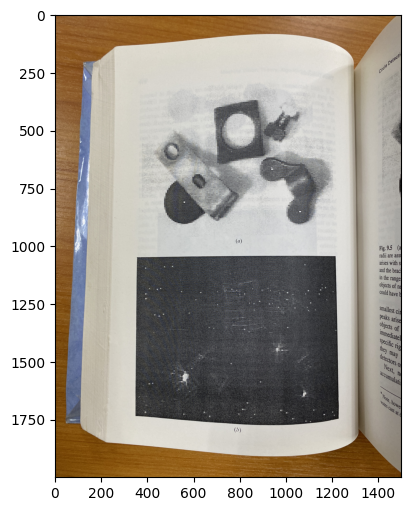

In [42]:
input_dir = 'data'
output_dir = 'data_resized'
# if not os.path.exists(output_dir):
    # os.makedirs(output_dir)
for i, filename in enumerate(os.listdir(input_dir)):
    if filename.endswith('.JPEG') and i == 0:
        print(i, filename)
        input_image_path = os.path.join(input_dir, filename)
        output_image_path = os.path.join(output_dir, filename)
        resized_image = resize_image(input_image_path, 2000)
        # show image
        # make figsize=(10, 10)
        plt.figure(figsize=(6, 6))
        plt.imshow(resized_image)
        plt.show()

In [39]:
# grab image names in the folder input_dir
filenames = []
for filename in os.listdir(input_dir):
    if filename.endswith('.JPEG'):
        filenames.append(filename)
print(filenames)

['IMG_0332.JPEG', 'IMG_0347.JPEG', 'IMG_0329.JPEG', 'IMG_0338.JPEG', 'IMG_0326.JPEG', 'IMG_0330.JPEG', 'IMG_0327.JPEG', 'IMG_0340.JPEG', 'IMG_0345.JPEG', 'IMG_0331.JPEG', 'IMG_0336.JPEG', 'IMG_0348.JPEG', 'IMG_0341.JPEG', 'IMG_0333.JPEG', 'IMG_0343.JPEG', 'IMG_0335.JPEG', 'IMG_0337.JPEG', 'IMG_0342.JPEG', 'IMG_0344.JPEG', 'IMG_0339.JPEG', 'IMG_0346.JPEG', 'IMG_0334.JPEG', 'IMG_0328.JPEG']


In [40]:
filenames[0]

'IMG_0332.JPEG'

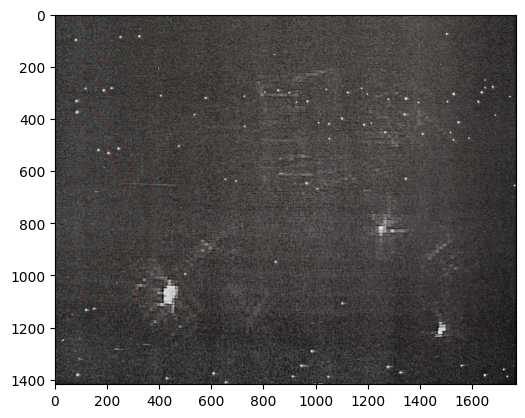

In [41]:
dewarp_auto(os.path.join(input_dir, filenames[0]))